To be put into order
1. Summary
2. Introduction
3. Technologies and Techniques
4. Results
5. Discussion
    - How much energy is currently curtailed annually across the Orkney Isles?
    - How much can this be reduced by different levels of DR penetration?
    - How many local households would need to be on our DR scheme in order to supply this level of DR?
6. References
7. Appendix

# Objective
Effective use of curtailed power and find business opportunity, analyzing viability of business proposition to go / no go.

If we can control demand, we may be able to use it to balance the system instead of curtailing
generators. This could provide a number of benefits: 
- it would reduce wastage of renewable energy and thus increase the fraction of energy generated by renewables within the UK;
- it could provide access to cheaper energy for local consumers on Orkney, reducing fuel poverty and linking locals to the benefits of wind turbine development on the isles;
- it would increase the revenue of generators close to the top of the curtailment order and therefore improve the business case for building new (marginal) generators;
- it could help to avoid more costly network capacity upgrades, which would be an alternative solution to the curtailment problem


# Hypothesis:
1. There is sizable wasted power due to curtailment.
2. There will be physically sufficient room for power storage which absorbs redundant power which otherwise curtailed. 
3. Value of such curtailed power is large enough to be shared among households and the company, and additional investment for batteries, hot water storage can be paid back in 3 years.(for example)
4. High wind speed + Low demand results in higher curtailment. For instance, more windy days during autumn and winter, and during nights and midnights. However, not much demand in midnights which could possibly cause higher curtailments in all seasons.
5. Low wind speed + High demand results in lower curtailment. For instance, demands during nights could be higher, but in summer time wind speed is generally lower, which could result in lower curtailments.
6. Due to the geographical location, Orkney never lack of wind and sometimes could be very windy with gusts even in summer. Therefore, we may not be able to see a clear seasonal trend of curtailment.

# Assumptions:
1. Wind velocity pattern and demand stay the same level as those of data explored. 
2. Electricity price :   XX pounds/kWh


Wind turbines in the industrial field usually limit the output power at a power set-point, which is always below the optimal operating condition. 

Q: What to do with power > set point?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Data import

## residential_demand.csv 

In [2]:
df_demand = pd.read_csv('residential_demand.csv',parse_dates=['Timestamp'], infer_datetime_format= True)

In [3]:
df_demand.head(3)

,Timestamp,Demand_mean_kw,N_households
0,2017-01-01 00:00:00,0.220106,5428
1,2017-01-01 00:30:00,0.205945,5429
2,2017-01-01 01:00:00,0.189090,5429


In [4]:
# no null data
df_demand.isnull().describe()

,Timestamp,Demand_mean_kw,N_households
count,17568,17568,17568
unique,1,1,1
top,False,False,False
freq,17568,17568,17568


In [5]:
# no 0 data
df_demand.describe()

,Demand_mean_kw,N_households
count,17568.000000,17568.000000
mean,0.219090,8630.642133
std,0.090129,2999.141750
min,0.086607,5406.000000
25%,0.143592,6781.000000
50%,0.212315,8190.500000
75%,0.273678,9652.000000
max,0.509662,30037.000000


## turbine_telemetry.csv

In [6]:
df_supply = pd.read_csv('turbine_telemetry.csv',parse_dates=['Timestamp'], infer_datetime_format= True)
df_supply.head(3)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
0,2015-05-28 00:00:23,80.0,900.0,4.9
1,2015-05-28 00:01:23,78.0,900.0,5.4
2,2015-05-28 00:02:23,52.0,900.0,4.9


In [7]:
df_supply.isnull().describe()
# Q: What should we do with Null Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?

,Timestamp,Power_kw,Setpoint_kw,Wind_ms
count,1069636,1069636,1069636,1069636
unique,1,2,2,2
top,False,False,False,False
freq,1069636,1066934,1066921,1066931


In [8]:
df_supply.replace(0,np.nan).dropna().describe()
# Q: What should we do with 0 Power_kw, Setpoint_kw, Wind_ms? Remove from dataset?

,Power_kw,Setpoint_kw,Wind_ms
count,909555.00000,909555.000000,909555.000000
mean,428.41149,885.178707,10.053555
std,330.10059,92.635897,5.078488
min,1.00000,11.000000,1.900000
25%,121.00000,900.000000,6.400000
50%,343.00000,900.000000,9.000000
75%,801.00000,900.000000,12.200000
max,938.00000,900.000000,40.400000


# Visualising raw data see any obvious trends or missing data

## Household

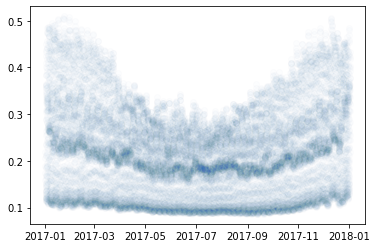

In [9]:
plt.scatter(df_demand['Timestamp'] , df_demand['Demand_mean_kw'], alpha=0.01)

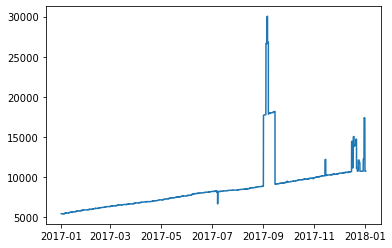

In [10]:
plt.plot(df_demand['Timestamp'] , df_demand['N_households'])

#### There're 4 spikes, data to be removed ......

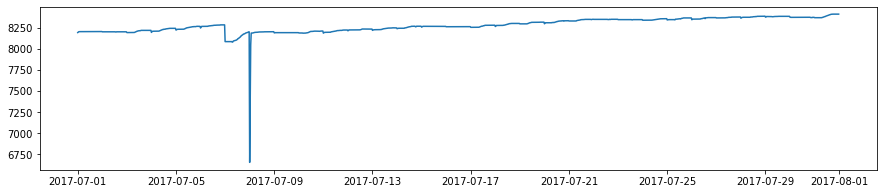

In [11]:
n=7
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

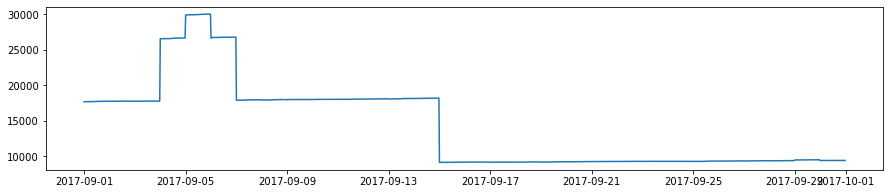

In [12]:
n=9
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

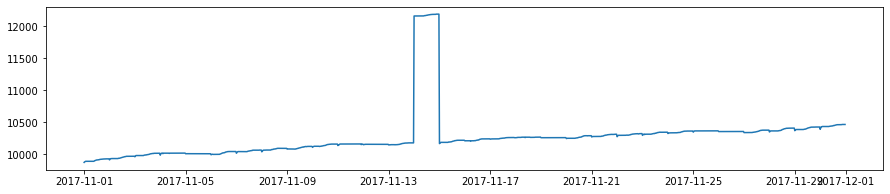

In [13]:
n=11
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

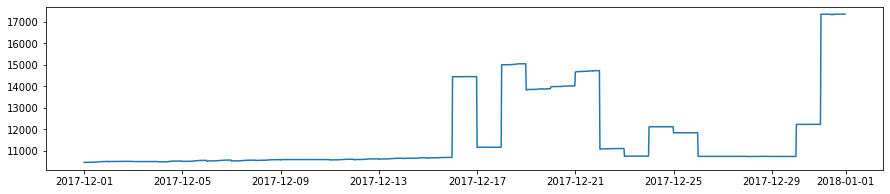

In [14]:
n=12
plt.figure(figsize=(15,3))
plt.plot(df_demand[df_demand['Timestamp'].dt.month == n]['Timestamp'], df_demand[df_demand['Timestamp'].dt.month == n]['N_households'])

## Turbine

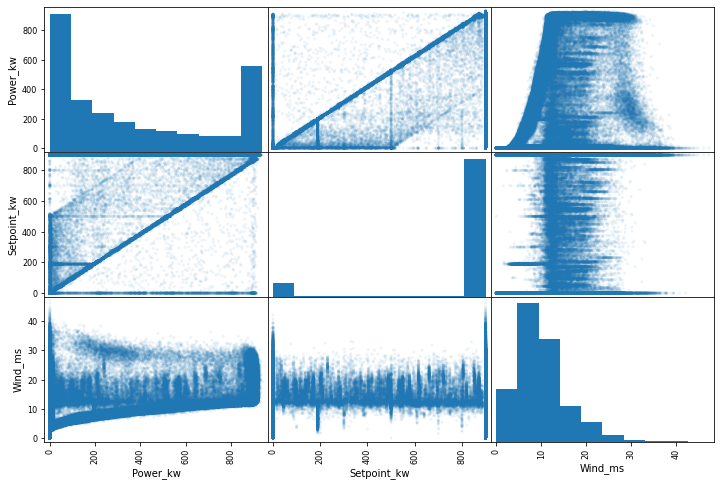

In [15]:
from pandas.plotting import scatter_matrix

#----------------------------------
#draw a scatterplot to look the relationship of each variables
d=scatter_matrix(df_supply, figsize=(12,8),alpha=0.08)

Missing data
1. 2015 data are not completed, but not faulty. We'll drop 2015 data in plotting some graphs.
2. Some 2017-04 data missing, but it's alright as we have 2016's

Q: Should we remove Power_kW above setpoint?

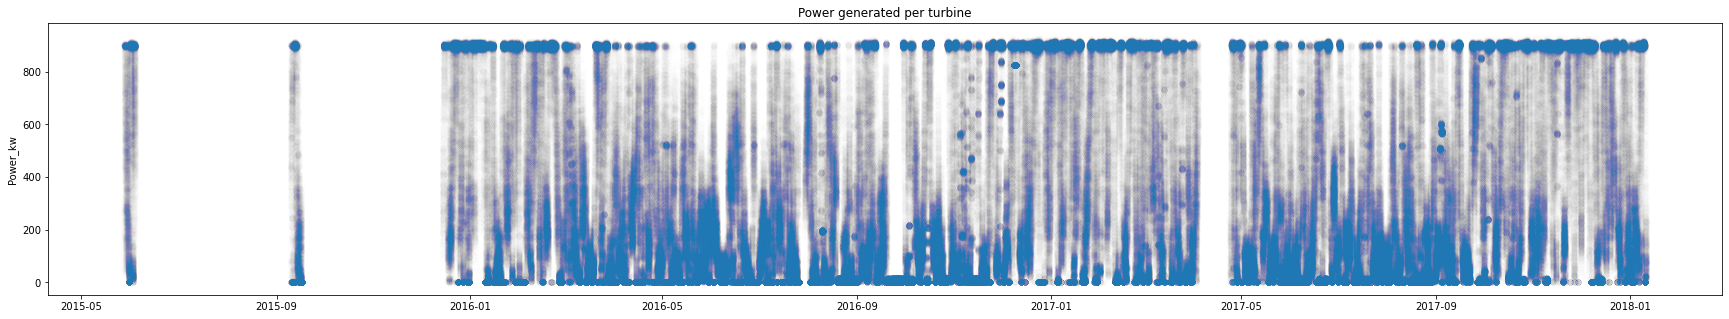

In [71]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Power_kw'], alpha = 0.005)
plt.ylabel('Power_kw')
plt.title('Power generated per turbine')

plt.show()

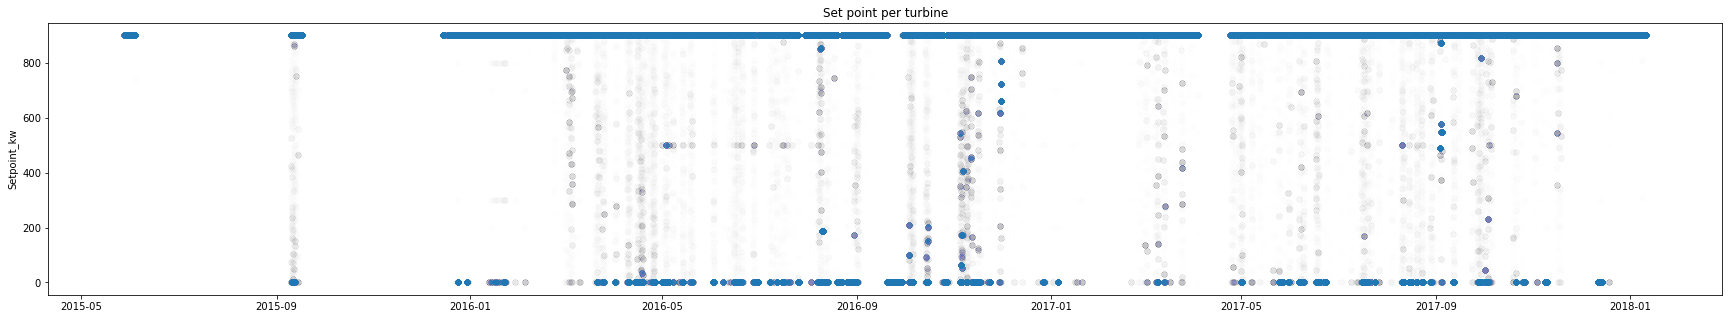

In [17]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Setpoint_kw'], alpha = 0.005)
plt.ylabel('Setpoint_kw')
plt.title('Set point per turbine')

plt.show()

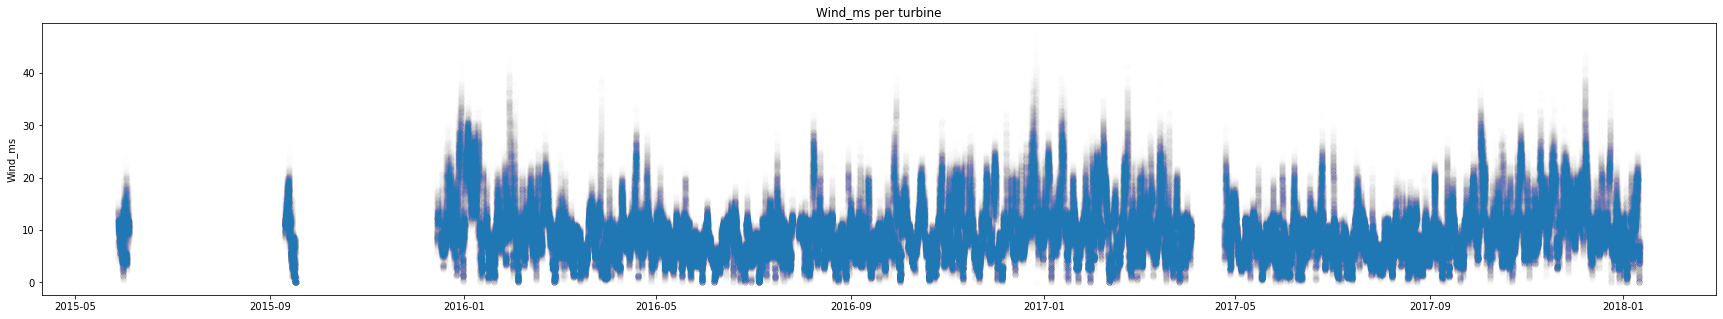

In [18]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(30,5))
plt.scatter(df_supply['Timestamp'], df_supply['Wind_ms'], alpha = 0.005)
plt.ylabel('Wind_ms')
plt.title('Wind_ms per turbine')

plt.show()

In [19]:
# 28% of record show wind speed >= 12m/s
len(df_supply[df_supply['Wind_ms'] >= 12])/len(df_supply)

0.2809039710705324

# Choosing blade length for potential power calculation

#### Potential power (kW) = 0.5 * air density 1.23 * (pi * blade length^2) * (wind speed^3) * Power coefficient 0.4 / 1000
We use power coefficient 0.4 because ......

We tried to find the blade length where the potential power generated is the closest to the actual power ...... power points bounced evenly around the 26 curve....

Vertical line wind speed 12m/s is plotted to show us .....

Length = 26m is the best fitted 

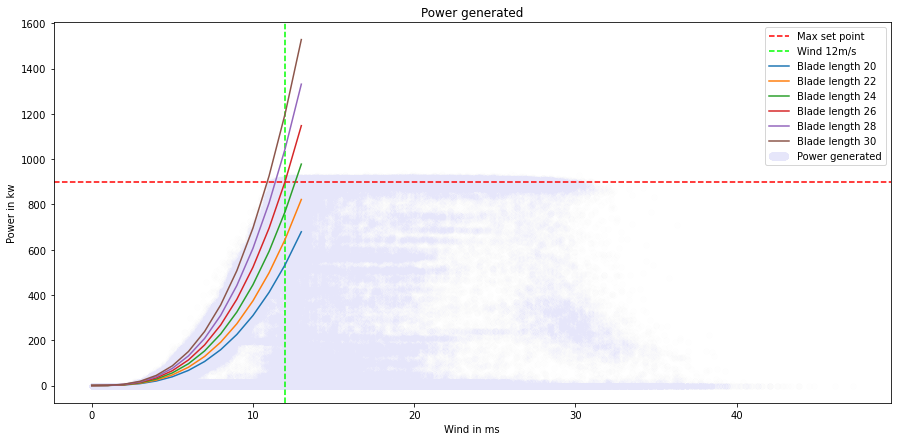

In [20]:
plt.figure(figsize=(15,7))

plt.scatter(df_supply['Wind_ms'],df_supply['Power_kw'], alpha=0.005, label='Power generated', color='lavender')
plt.axhline(y=900, color='r', linestyle='--', label='Max set point')
plt.axvline(12, color='lime', linestyle='--', label='Wind 12m/s')

# potential power curve
w = np.array(range(0,14)) # wind speed
length = range(20,31,2) # blade length in m
for l in length:
    potential_power=0.5*1.23*(np.pi*l**2)*(w**3)*0.4/1000
    plt.plot(potential_power, label='Blade length '+str(l))
    
plt.xlabel('Wind in ms')
plt.ylabel('Power in kw')
plt.title('Power generated')
plt.legend(scatterpoints=1000)
plt.show()

# Curtailed power (kW)

#### What is curtailed power?
How $strong$ the current is ......

#### Curtailed power equation
curtailed power (kW) = potential power - total power consumed 

where,
- potential power: before 12m/s = theoratical potential power ; after 12m/s = 900kW (Max set point due to mechanical limitation. Theoratically can reach a higher power but practically constrainted by current mechanical design.)
- total power consumed = total power generated (Power_kw)

# Curtailed energy (kWh)

#### What is curtailed energy?
How $much$ energy actually curtailed....
We are interested in curtailed energy, not curtailed power because electricity provider charge us in terms of energy, not power.

- Energy: aggregate to area in time chart

#### Curtailed energy equation
Curtailed energy in one minute (kWh) = curtailed power * 60 sec x 0.278 x 10^-3 

# Curtailment computation
Data used:
- df_supply: Drop NA and 0 records	
- df_demand: Drop 2018 and household number outliers
- Energy supply and demand should be quite constant in particular months across year, summer months should have less wind than winter months. Therefore, it is alright to have different years of supply and demand data, we can take the averages by months regardless year for curtailment calculation.

Columns:
- Timestamp
- Power_kw:	average power in kW during the measurement period
- Setpoint_kw:	the mean maximum-allowed generator output during the measurement period
- Wind_ms:	mean wind speed at the turbine during the measurement period.
- Potential_power_kw:	potential energy of single turbine = 0.5 * 1.23 * (pi * 26^2) * wind speed ^3 * 0.4 / 1000
- Cutailed_power_kw: potential power - total power consumed 
- Cutailed_energy_in_1_minute_kwh:	Aggregated power in 1 minute. curtailed power * 60 sec x 0.278 x 10^-3 

In [21]:
df_curtail = df_supply[:].replace(0,np.nan).dropna() # drop NA and 0 Power_kw, Setpoint_kw, Wind_ms
df_curtail['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(df_curtail['Wind_ms']**3)*0.4/1000
df_curtail['Potential_power_kw'][df_curtail['Wind_ms'] >= 12] = 900
df_curtail['Cutailed_power_kw'] = df_curtail['Potential_power_kw'] - df_curtail['Power_kw']
df_curtail['Cutailed_power_kw'][df_curtail['Cutailed_power_kw'] < 0] = 0 # set negative curtailment to 0
df_curtail['Cutailed_energy_in_1_minute_kwh'] = df_curtail['Cutailed_power_kw']*60 * 0.278 /100
df_curtail.head(3)

,Timestamp,Power_kw,Setpoint_kw,Wind_ms,Potential_power_kw,Cutailed_power_kw,Cutailed_energy_in_1_minute_kwh
0,2015-05-28 00:00:23,80.0,900.0,4.9,61.463872,0.000000,0.000000
1,2015-05-28 00:01:23,78.0,900.0,5.4,82.264593,4.264593,0.711334
2,2015-05-28 00:02:23,52.0,900.0,4.9,61.463872,9.463872,1.578574


Q: what to do with negative Cutailed_power_kw? Change to 0 because no curtailment

## Curtailed energy plots

In [39]:
tmp = df_supply.replace(0,np.nan).dropna() # drop NA and 0 Power_kw, Setpoint_kw, Wind_ms
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)
set_point_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Setpoint_kw', aggfunc=np.mean)

In [56]:
tmp = df_curtail[:]
tmp['Time_yyyymm'] = tmp.Timestamp.dt.strftime('%Y-%m')
tmp['Time_year'] = tmp.Timestamp.dt.year
tmp['Time_month'] = tmp.Timestamp.dt.month
tmp['Time_hour'] = tmp.Timestamp.dt.hour

# Hourly sum of curtailed energy
Sum_YearMonthHour_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month','Time_hour'], values='Cutailed_energy_in_1_minute_kwh', aggfunc='sum').reset_index().rename(columns={'Cutailed_energy_in_1_minute_kwh': 'Hourly_curtailed_energy_kwh'})
# Monthly sum of curtailed energy
Sum_YearMonth_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_year','Time_month'], values='Cutailed_energy_in_1_minute_kwh', aggfunc='sum').rename(columns={'Cutailed_energy_in_1_minute_kwh': 'YearMonth_Sum_curtailed_energy_kWh'})

# Average curtailed energy per hour
Avg_MonthHour_curtailed_energy_kWh = pd.pivot_table(Sum_YearMonthHour_curtailed_energy_kWh, index=['Time_month','Time_hour'], values='Hourly_curtailed_energy_kwh', aggfunc='mean').rename(columns={'Hourly_curtailed_energy_kwh': 'MonthHour_Avg_curtailed_energy_kWh'}).join(wind_avg)
# Average curtailed energy per months
tmp = Sum_YearMonth_curtailed_energy_kWh.reset_index()
Avg_Month_curtailed_energy_kWh = pd.pivot_table(tmp, index=['Time_month'], values='YearMonth_Sum_curtailed_energy_kWh', aggfunc='mean').rename(columns={'YearMonth_Sum_curtailed_energy_kWh': 'Month_Avg_curtailed_energy_kWh'})


In [73]:
Sum_YearMonthHour_curtailed_energy_kWh.head(3)

,Time_year,Time_month,Time_hour,Hourly_curtailed_energy_kwh
0,2015,5,0,280.963082
1,2015,5,1,280.373090
2,2015,5,2,321.438916


In [57]:
Sum_YearMonth_curtailed_energy_kWh.head(3)

YearMonth_Sum_curtailed_energy_kWh
Time_year Time_month                                    
2015      5                                 12774.245076
          6                                 10443.527481
          9                                 85447.918778

In [58]:
Avg_MonthHour_curtailed_energy_kWh.head(3)

MonthHour_Avg_curtailed_energy_kWh    Wind_ms
Time_month Time_hour                                               
1          0                                 8488.907984  13.032235
           1                                 7095.622847  13.169909
           2                                 6922.609888  13.283342

In [25]:
Avg_Month_curtailed_energy_kWh.head(3)

,Month_Avg_curtailed_energy_kWh
Time_month,
1,147768.975397
2,150591.592431
3,270720.610655


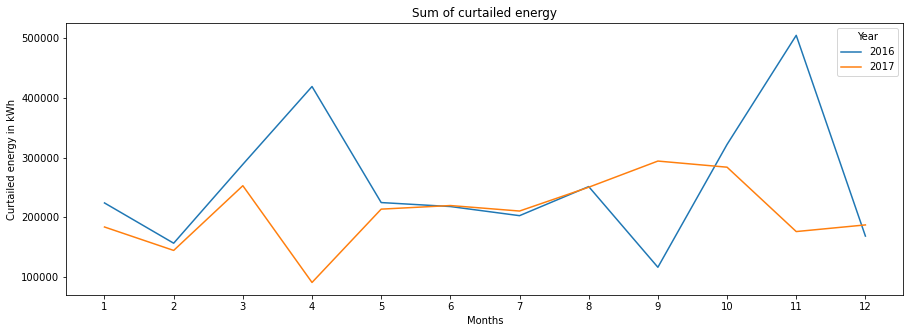

In [26]:
plt.figure(figsize=(15,5))
for i in [2016,2017]:
    plt.plot(Sum_YearMonth_curtailed_energy_kWh.loc[(i)], label=i)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Sum of curtailed energy')
plt.legend(title='Year')

plt.show()

### Observations:
Curtailed energy in 2017 is in general lower than 2016, this could possibly due to increasing households thus using more energy. 

Opposite trends in Apr, Sep and Nov could due to wind speed differences . More plots needed for further investigation ..... TBC

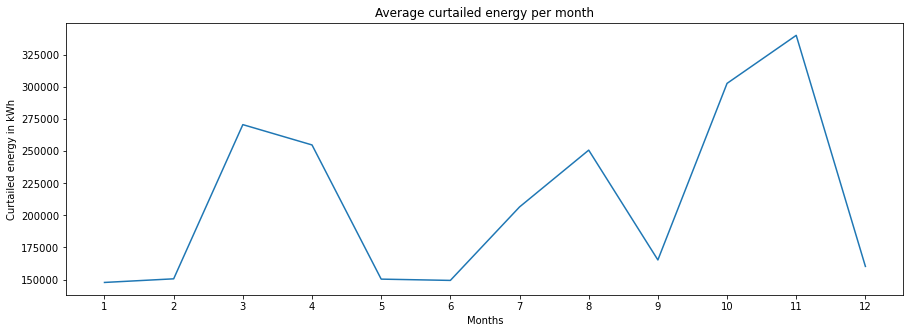

In [27]:
plt.figure(figsize=(15,5))
plt.plot(Avg_Month_curtailed_energy_kWh)
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Months')
plt.xticks(range(1,13,1))
plt.title('Average curtailed energy per month')

plt.show()

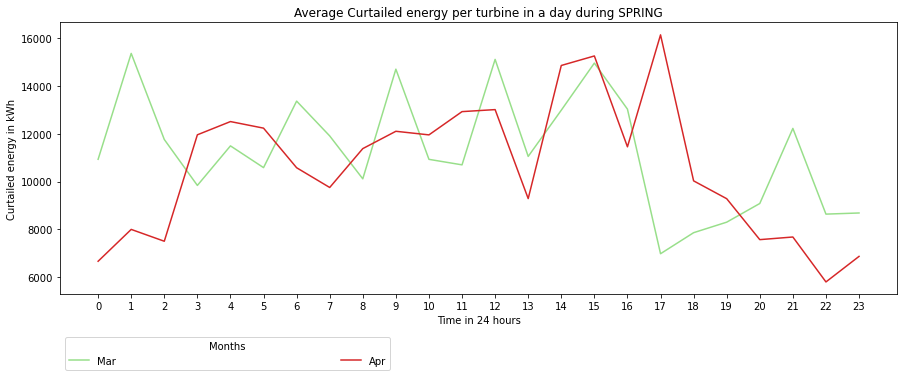

In [70]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(3,5):   
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'MonthHour_Avg_curtailed_energy_kWh'], label=month[i-1], color=colors[i])

plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SPRING')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.4, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

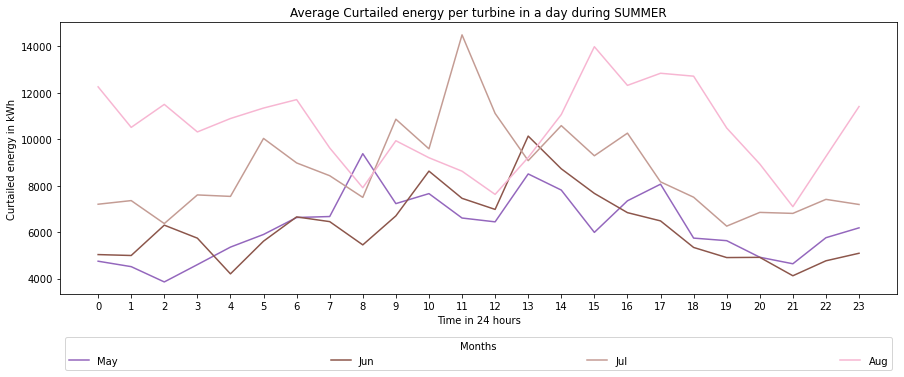

In [29]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(5,9):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'MonthHour_Avg_curtailed_energy_kWh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during SUMMER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

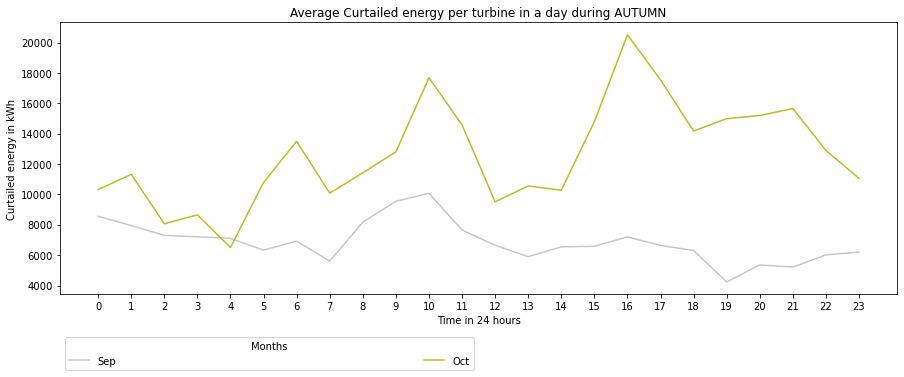

In [30]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(9,11):
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'MonthHour_Avg_curtailed_energy_kWh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during AUTUMN')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 0.5, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

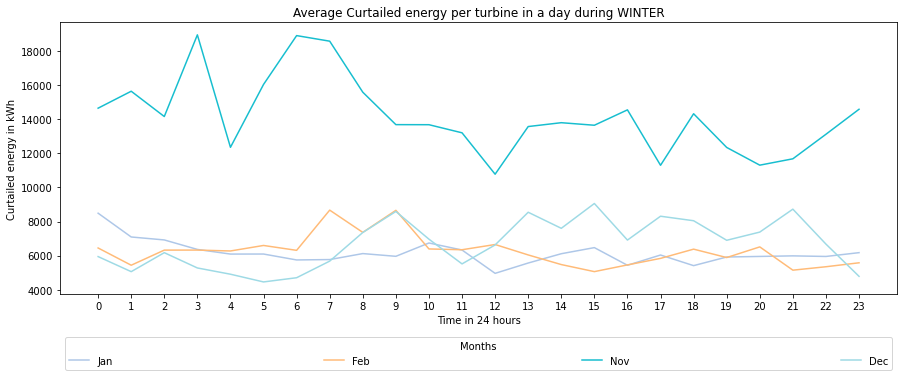

In [31]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in [1,2,11,12]:
    plt.plot(Avg_MonthHour_curtailed_energy_kWh.loc[(i),'MonthHour_Avg_curtailed_energy_kWh'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailed energy in kWh')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed energy per turbine in a day during WINTER')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

# Averge demands per households

In [32]:
# Averge demands per households

tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.

# Drop outliers
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)

tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour

demand_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)


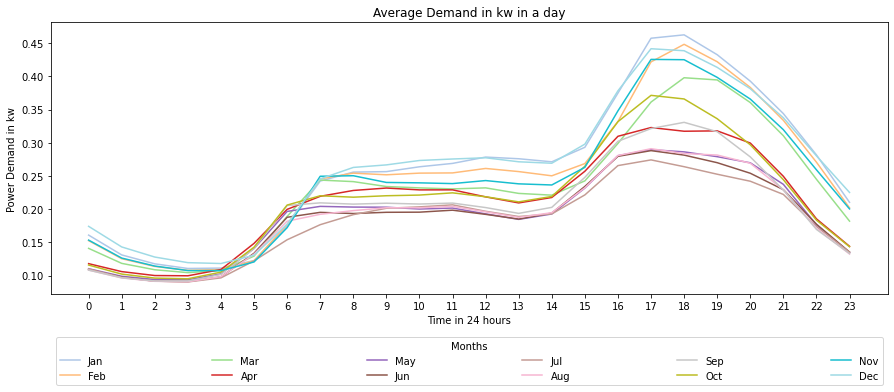

In [33]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(demand_avg.loc[(i),'Demand_mean_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Power Demand in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Demand in kw in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

# Electricity cost in Orkney
https://www.switch-plan.co.uk/suppliers/scottish-power/orkney/
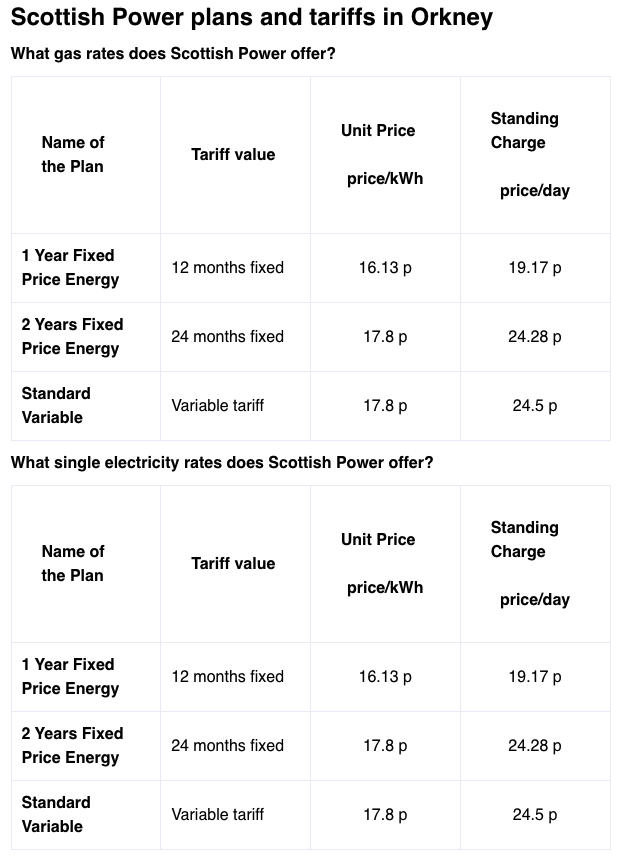

In [34]:
tmp = df_supply.replace(0,np.nan).dropna() # drop NA and 0 Power_kw, Setpoint_kw, Wind_ms
tmp['Time_month'] = df_supply.Timestamp.dt.month
tmp['Time_hour'] = df_supply.Timestamp.dt.hour
power_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Power_kw', aggfunc=np.mean)
wind_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Wind_ms', aggfunc=np.mean)
set_point_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Setpoint_kw', aggfunc=np.mean)

In [35]:
tmp=df_demand[df_demand.Timestamp.dt.year == 2017] # 2018 only have one month data. Drop 2018 for easier calculation.
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 7][tmp['N_households'] < 8000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 9][tmp['N_households'] > 15000].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 11][tmp['N_households'] > 10500].index)
tmp=tmp.drop(index = tmp['N_households'][tmp['Timestamp'].dt.month == 12][tmp['N_households'] > 11000].index)
tmp['Time_month'] = tmp['Timestamp'].dt.month
tmp['Time_hour'] = tmp['Timestamp'].dt.hour
demand_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='Demand_mean_kw', aggfunc=np.mean)
N_households_avg = pd.pivot_table(tmp, index=['Time_month', 'Time_hour'], values='N_households', aggfunc=np.mean)

In [36]:
curtailment = demand_avg.join(N_households_avg).join(power_avg).join(set_point_avg).join(wind_avg)

curtailment['Potential_power_kw'] = 0.5*1.23*np.pi*26**2*(curtailment['Wind_ms']**3)*0.4/1000
curtailment['Potential_power_kw'][curtailment['Wind_ms'] >= 12] = 900
curtailment['Curtailed_power_kw'] = curtailment['Potential_power_kw'] - (curtailment['Demand_mean_kw']*curtailment['N_households'] + 40*1000) / 500
curtailment['Curtailed_power_kw_total'] = 500*curtailment['Curtailed_power_kw']

curtailment.head(3)

Demand_mean_kw  N_households    Power_kw  Setpoint_kw  \
Time_month Time_hour                                                          
1          0                0.161041   5657.258065  565.836015   900.000000   
           1                0.131207   5664.483871  583.204421   899.818205   
           2                0.117763   5664.693548  608.132205   899.683236   

                        Wind_ms  Potential_power_kw  Curtailed_power_kw  \
Time_month Time_hour                                                      
1          0          13.032235               900.0          818.177898   
           1          13.169909               900.0          818.513560   
           2          13.283342               900.0          818.665818   

                      Curtailed_power_kw_total  
Time_month Time_hour                            
1          0                     409088.948988  
           1                     409256.780224  
           2                     409332.908889

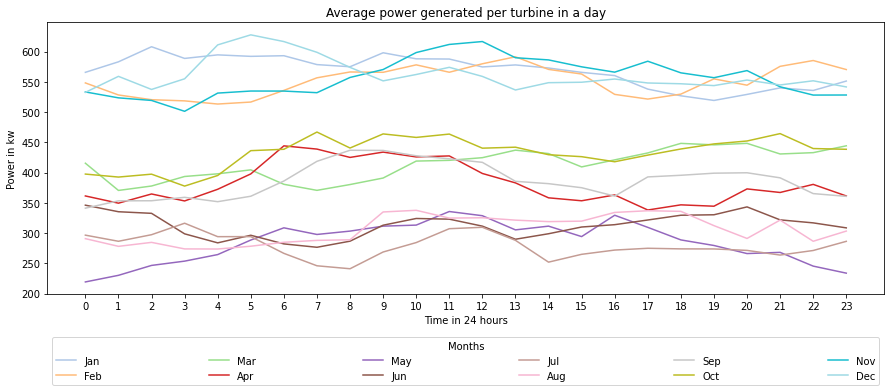

In [38]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Power_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Power in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average power generated per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

In [ ]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Setpoint_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Setpoint in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average set point per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

In [ ]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Demand_mean_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Power Demand in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Demand in kw in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

In [ ]:
n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Curtailment_kw'], label=month[i-1], color=colors[i])
plt.ylabel('Curtailment in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Average Curtailed power per turbine in a day')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

In [ ]:
curtailment['Affordable_extra_households'] = curtailment['Curtailment_kw'] / curtailment['Demand_mean_kw']

n=13
colors = plt.cm.tab20(np.linspace(0,1,n,retstep=True)[0])
plt.figure(figsize=(15,5))
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(1,n):
    plt.plot(curtailment.loc[(i),'Affordable_extra_households'], label=month[i-1], color=colors[i])
plt.ylabel('Number of households')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,24,1))
plt.title('Number of extra housholds affordable per turbine')
plt.legend(title='Months',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

High wind speed but low power generated: demand is low during that time
Wind speed always high enough to support demand, so this is not a constraint

In [ ]:
tmp = curtailment.reset_index(level=['Time_month', 'Time_hour'])
tmp

In [ ]:
plt.scatter(tmp['Time_month'],tmp['Potential_power_kw'], alpha=0.1)
plt.scatter(tmp['Time_month'],tmp['Potential_power_kw'], alpha=0.1)
plt.scatter(tmp['Time_month'],tmp['Potential_power_kw'], alpha=0.1)

In [ ]:
np.mean(tmp['Potential_power_kw'][tmp['Time_month'] == 1])

In [ ]:
# Average curtailed energy in Jan
tmp = curtailment.reset_index(level=['Time_month', 'Time_hour'])
m = 6
plt.figure(figsize=(15,5))
plt.scatter(tmp['Time_month'], tmp['Potential_power_kw'], label='Potential power', alpha=0.5)
plt.scatter(tmp['Time_month'], tmp['Curtailment_kw'], label='Curtailed power', alpha=0.5)
plt.scatter(tmp['Time_month'], tmp['Power_kw'], label='Power generated', alpha=0.5)
plt.ylabel('Power in kw')
plt.xlabel('Time in 24 hours')
plt.xticks(range(0,13,1))
plt.title('Average Curtailment')
plt.legend(title='Lengend',bbox_to_anchor=(0., -0.24, 1, .102),ncol=6, mode="expand",loc='upper center')

plt.show()

In [ ]:
plt.plot(curtailment['Power_kw'], label='Power generated')